In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import time

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
train_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
test_df.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


### Data Preproccessing

1. Fill the non-exictent values with something
2. Clean the text column into clean_text column

    1. Convert it to lower case
    2. Remove special characters
    3. Remove punctuations
    4. Spell check
    5. Tokenize
    6. Remove stop words
3. Stemming and Lemmatisation
4. Vectorize words

#### 1. Fill the non-exictent values with something

In [9]:
train_df["author"] = train_df["author"].fillna("Unknown",axis=0)
train_df["title"] = train_df["title"].fillna("Unknown",axis=0)
train_df["text"] = train_df["text"].fillna("Not Available",axis=0)

In [10]:
test_df["author"] = test_df["author"].fillna("Unknown",axis=0)
test_df["title"] = test_df["title"].fillna("Unknown",axis=0)
test_df["text"] = test_df["text"].fillna("Not Available",axis=0)

#### 2. Clean the text column

##### A. Convert it to lower case

In [11]:
train_df["clean_text"] = train_df["text"].astype(str)

In [12]:
train_df["clean_text"] = train_df["clean_text"].apply(lambda str1: str1.lower())

##### B. Remove special characters

In [13]:
train_df["clean_text"] = train_df["clean_text"].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

##### C. Remove punctuations

In [14]:
train_df["clean_text"] = train_df["clean_text"].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

##### D. Spell check

In [ ]:
# Optional. Takes a lot of time and memory
train_df["clean_text"] = train_df["clean_text"].apply(lambda x: str(TextBlob(x).correct()))

##### E. Tokenize

In [15]:
train_df["clean_text"] = train_df["clean_text"].apply(lambda x: word_tokenize(x))

##### F. Remove stop words

In [16]:
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
train_df["clean_text"] = train_df["clean_text"].apply(lambda x: [word for word in x if not word in stop_words])

#### 3. Stemming and Lemmatisation

##### Steming, removing -ing, -ly, -ed from the words. For example feeling to feel

In [18]:
stemizer = PorterStemmer()

train_df["stemmed_text"] = train_df["clean_text"].apply(lambda x: " ".join([stemizer.stem(i) for i in x]))

##### Lemmatization, converting a word to its base form. For example been to be

In [19]:
lemmatizer = WordNetLemmatizer()

train_df["lematized_text"] = train_df["clean_text"].apply(lambda x: " ".join([lemmatizer.lemmatize(i) for i in x]))

In [20]:
train_df.head()

,id,title,author,text,label,clean_text,stemmed_text,lematized_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,"[house, dem, aide, even, see, comey, letter, j...",hous dem aid even see comey letter jason chaff...,house dem aide even see comey letter jason cha...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"[ever, get, feeling, life, circles, roundabout...",ever get feel life circl roundabout rather hea...,ever get feeling life circle roundabout rather...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,"[truth, might, get, fired, october, 29, 2016, ...",truth might get fire octob 29 2016 tension int...,truth might get fired october 29 2016 tension ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,"[videos, 15, civilians, killed, single, us, ai...",video 15 civilian kill singl us airstrik ident...,video 15 civilian killed single u airstrike id...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,"[print, iranian, woman, sentenced, six, years,...",print iranian woman sentenc six year prison ir...,print iranian woman sentenced six year prison ...


### Exploratory Data Analysis

1. What is the distribution of labels (reliable vs. unreliable)?
2. What are the most common words/phrases used in the titles?
3. What is the average length of the articles (text)?
4. Is there a correlation between the length of the text and the reliability label?
5. What are the most frequent words in the text of reliable and unreliable articles?
6. Who are the top authors contributing to the dataset?
7. Are certain authors more likely to write unreliable articles?
8. Is there a relationship between the emotion of the text and the reliability?

#### 1. What is the distribution of labels (reliable vs. unreliable)?

In [21]:
reliable = train_df.loc[train_df["label"] == 1].count()[0]
unreliable = train_df.loc[train_df["label"] == 0].count()[0]

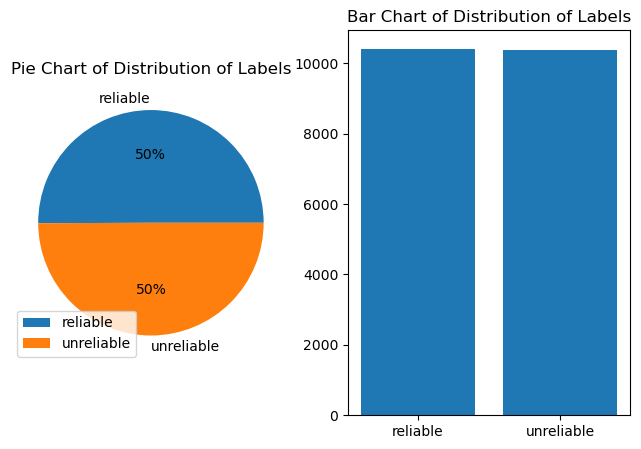

In [22]:
labels_d = ["reliable","unreliable"]

fig1,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8,5))

ax1.pie([reliable,unreliable],labels = labels_d,autopct="%.f%%")
ax1.set_title("Pie Chart of Distribution of Labels")
ax1.legend()

ax2.bar(labels_d,[reliable,unreliable])
ax2.set_title("Bar Chart of Distribution of Labels")

plt.show()

#### 2. What are the most common words/phrases used in the titles?

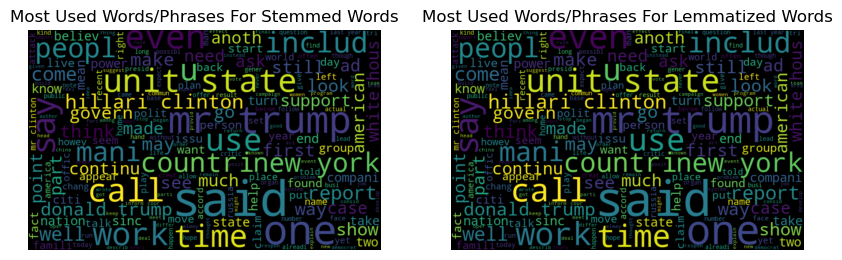

In [23]:
# for stemmed words
words_stemmed = ' '.join([text for text in train_df["stemmed_text"]])

wordcloud_stem = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_stemmed)

# for lemmatized words
words_lemm = ' '.join([text for text in train_df["lematized_text"]])

wordcloud_lemm = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_lemm)

fig1,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7))


ax1.imshow(wordcloud_stem, interpolation="bilinear")
ax1.axis("off")
ax1.set_title("Most Used Words/Phrases For Stemmed Words")

ax2.imshow(wordcloud_stem, interpolation="bilinear")
ax2.axis("off")
ax2.set_title("Most Used Words/Phrases For Lemmatized Words")

plt.show()

#### 3. What is the average length of the articles (text)?

In [24]:
avr_len = train_df["text"].apply(lambda x: len(x))

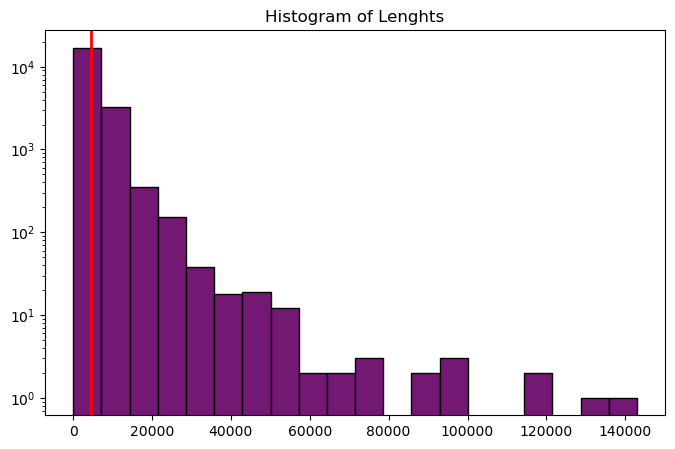

In [25]:
plt.figure(figsize = (8,5),dpi = 100)

plt.hist(avr_len,bins = 20,color = "#731873",edgecolor = "k",log = True)
plt.axvline(avr_len.mean(),color = "r",label = "Mean Lenght",linewidth = 2)

plt.title("Histogram of Lenghts")
plt.show()

#### 4. Is there a correlation between the length of the text and the reliability label?

In [26]:
train_len = train_df.copy()
train_len["len"] = train_df["text"].apply(lambda x: len(x))

In [27]:
import scipy.stats as stats
length_label_correlation = train_len[["len", "label"]].corr(method="pearson")
print(length_label_correlation)

stats.pearsonr(train_len["len"], train_len["label"])

            len     label
len    1.000000 -0.130442
label -0.130442  1.000000


PearsonRResult(statistic=-0.13044246849611496, pvalue=1.3192646868375697e-79)

#### 5. What are the most frequent words in the text of reliable and unreliable articles?

##### Reliable

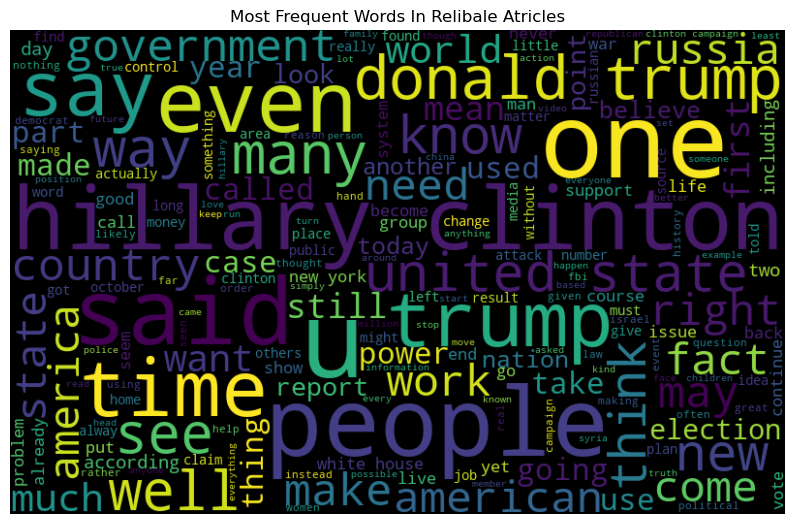

In [28]:
frq = " ".join([word for sublist in train_df.loc[train_df["label"] == 1]["clean_text"] for word in sublist])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(frq)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Frequent Words In Relibale Atricles")
plt.show()

##### Unreliable

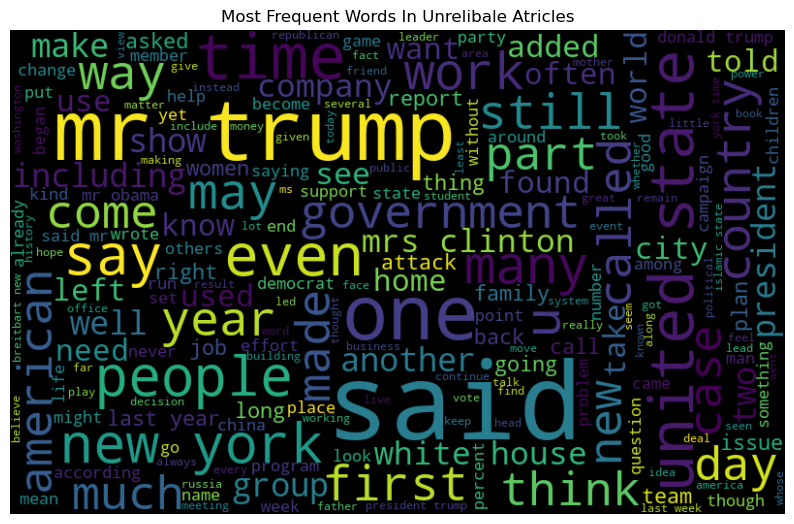

In [29]:
frq1 = " ".join([word for sublist in train_df.loc[train_df["label"] == 0]["clean_text"] for word in sublist])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(frq1)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Frequent Words In Unrelibale Atricles")
plt.show()

#### 6. Are certain authors more likely to write unreliable articles?

In [30]:
authors = train_df["author"].value_counts().reset_index()
count_aut = authors.nlargest(10,"count")
count_aut

,author,count
0,Unknown,1957
1,Pam Key,243
2,admin,193
3,Jerome Hudson,166
4,Charlie Spiering,141
5,John Hayward,140
6,Katherine Rodriguez,124
7,Warner Todd Huston,122
8,Ian Hanchett,119
9,Breitbart News,118


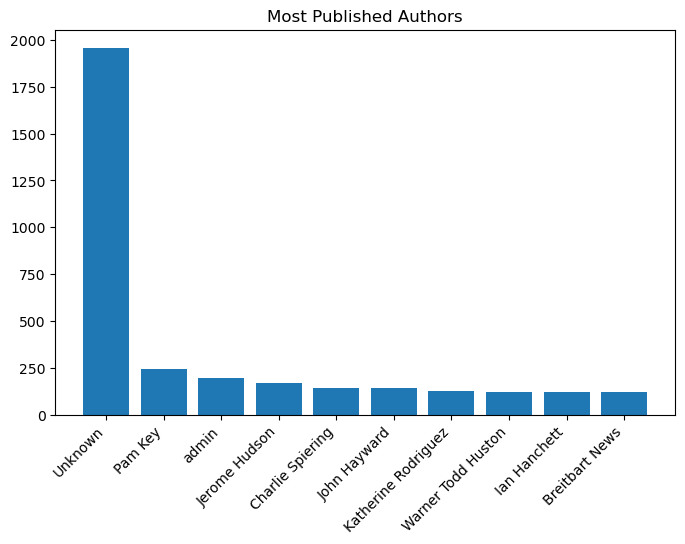

In [31]:
plt.figure(figsize = (8,5), dpi = 100)

plt.bar(count_aut["author"], count_aut["count"])
plt.title("Most Published Authors")
plt.xticks(count_aut["author"],rotation = 45, ha = "right")
plt.show()

#### 7. Are certain authors more likely to write unreliable articles?

In [32]:
unreliable_aut = train_df.loc[train_df["label"] == 0]["author"]
count_un_aut = unreliable_aut.value_counts().reset_index()[:10]

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_272\986808329.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(count_un_aut["author"], rotation=45, ha="right")


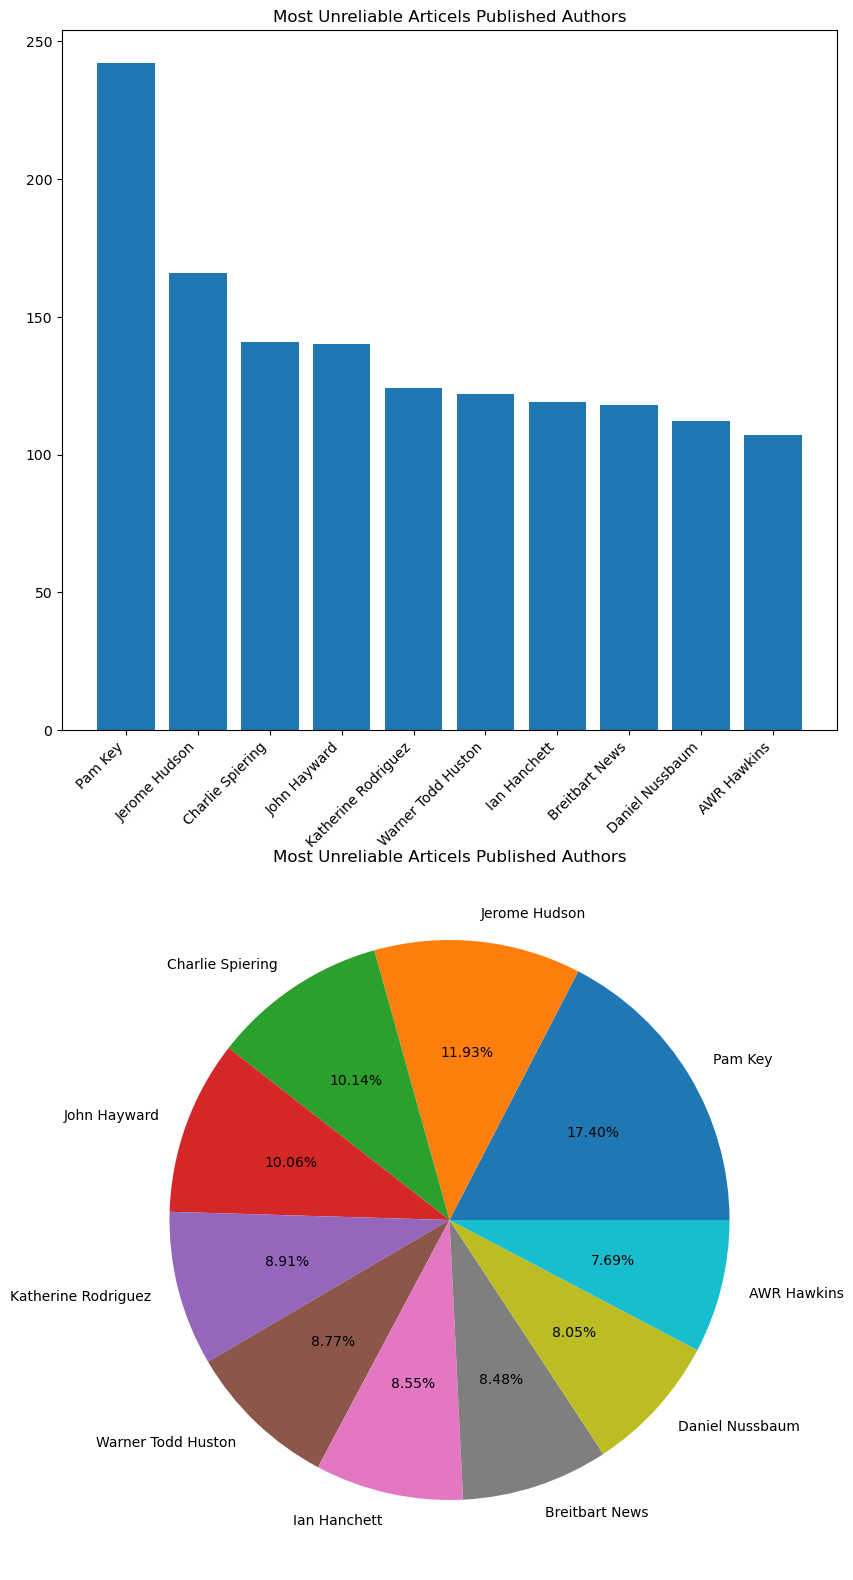

In [33]:
fig,(ax1,ax2) = plt.subplots(nrows = 2, ncols = 1,figsize = (10,20), dpi = 100)

ax1.bar(count_un_aut["author"], count_un_aut["count"])
ax1.set_title("Most Unreliable Articels Published Authors")
ax1.set_xticklabels(count_un_aut["author"], rotation=45, ha="right")

ax2.pie(count_un_aut["count"],labels = count_un_aut["author"],autopct="%.2f%%")
ax2.set_title("Most Unreliable Articels Published Authors")

plt.show()

#### 8. Is there a relationship between the emotion of the text and the reliability?

In [34]:
def get_emotion(text):
    emotion_list=[]
    emotions = TextBlob(text)
    if emotions.sentiment.polarity > 0:
        emotion_list.append(str("positive"))
    elif emotions.sentiment.polarity == 0:
        emotion_list.append(str("neutral"))
    else:
        emotion_list.append(str("negative"))
    return emotion_list

train_emotion = train_df.copy()
train_emotion["sentiment"] = train_emotion["text"].apply(get_emotion)

##### Distribution of semtiments

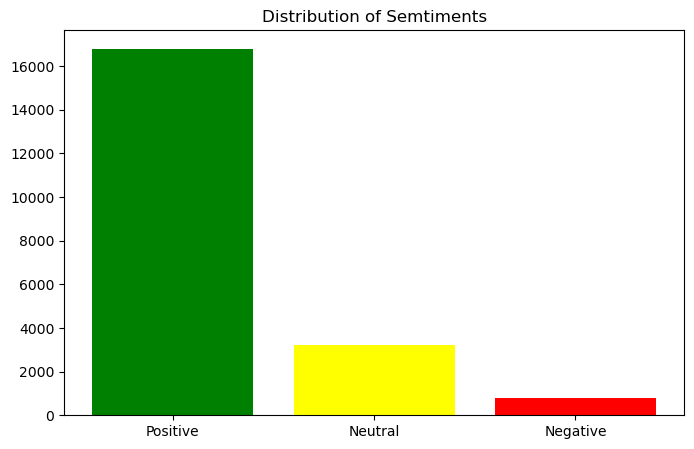

In [35]:
distr = train_emotion["sentiment"].value_counts()
labels_em = ["Positive","Neutral","Negative"]
colors = ["green","yellow","red"]
fig, ax1 = plt.subplots(nrows = 1, ncols = 1,figsize = (8,5), dpi = 100)


ax1.bar(labels_em,distr,color = colors)
ax1.set_title("Distribution of Semtiments")

plt.show()

##### Reliable vs Unreliable

In [36]:
unreliable_em = train_emotion.loc[(train_emotion["label"] == 0)]["sentiment"].value_counts()
reliable_em = train_emotion.loc[(train_emotion["label"] == 1)]["sentiment"].value_counts()

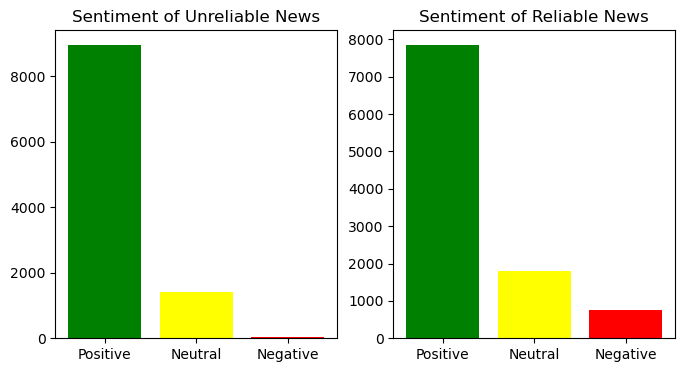

In [37]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (8,4),dpi = 100)
colors = ["green","yellow","red"]
labels_em = ["Positive","Neutral","Negative"]

ax1.bar(labels_em, unreliable_em, color = colors)
ax1.set_title("Sentiment of Unreliable News")

ax2.bar(labels_em, reliable_em, color = colors)
ax2.set_title("Sentiment of Reliable News")

plt.show()

### Celaning Function

In [38]:
def cleaning_text(text):
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    tokens = word_tokenize(text)
    

    stop_words = set(stopwords.words("turkish"))
    tokens = [word for word in tokens if word not in stop_words]
    
    tokens = [word for word in tokens if len(word) > 1]
    
    cleaned_text = " ".join(tokens)
    
    return cleaned_text


print("please input a text to label")
text_clean = input()
print(cleaning_text(text_clean))

please input a text to label
Today President Biden said the N word
today president biden said the word


### Model Training

#### Vectorize

In [39]:
y = train_df["label"]
X = train_df["clean_text"].apply(' '.join)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [40]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)


X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [41]:
X_train_tfidf.shape, X_test_tfidf.shape

((16640, 41369), (4160, 41369))

#### Logistic Regression

In [42]:
lr = LogisticRegression()
t0_lr = time.time()
lr.fit(X_train_tfidf,y_train)
t1_lr = time.time()
predict_lr = lr.predict(X_test_tfidf)
t2_lr = time.time()

time_train_lr = t1_lr - t0_lr
time_predic_lr = t2_lr - t1_lr

In [43]:
print(f"Training Time : {time_train_lr:.4f}")
print(f"Prediction Time : {time_predic_lr:.4f}")
report_lr = classification_report(y_test, predict_lr, output_dict=True)
reliable_metrics_lr = report_lr["1"]
unreliable_metrics_lr = report_lr["0"]
print(f"Metrics for Class Reliable News: {reliable_metrics_lr}")
print(f"Metrics for Class Unreliable News: {unreliable_metrics_lr}")


accuracy_lr = accuracy_score(y_test, predict_lr)
f1_score_lr = classification_report(y_test, predict_lr, output_dict=True)["macro avg"]["f1-score"]
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"F1 Score: {f1_score_lr:.2f}")

Training Time : 0.5555
Prediction Time : 0.0030
Metrics for Class Reliable News: {'precision': 0.9576354679802955, 'recall': 0.9585798816568047, 'f1-score': 0.9581074420896992, 'support': 2028.0}
Metrics for Class Unreliable News: {'precision': 0.9605633802816902, 'recall': 0.9596622889305816, 'f1-score': 0.960112623181605, 'support': 2132.0}
Accuracy: 0.96
F1 Score: 0.96


In [44]:
print(classification_report(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2132
           1       0.96      0.96      0.96      2028

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



In [45]:
r2_lr = r2_score(y_test, predict_lr)
mse_lr = mean_squared_error(y_test, predict_lr)
mae_lr = mean_absolute_error(y_test, predict_lr)

print("SVM (Linear) Calssification Metrics")
print(f"R^2 Score: {r2_lr:.4f}")
print(f"MSE Score: {mse_lr:.4f}")
print(f"MAE Score: {mae_lr:.4f}")

SVM (Linear) Calssification Metrics
R^2 Score: 0.8364
MSE Score: 0.0409
MAE Score: 0.0409


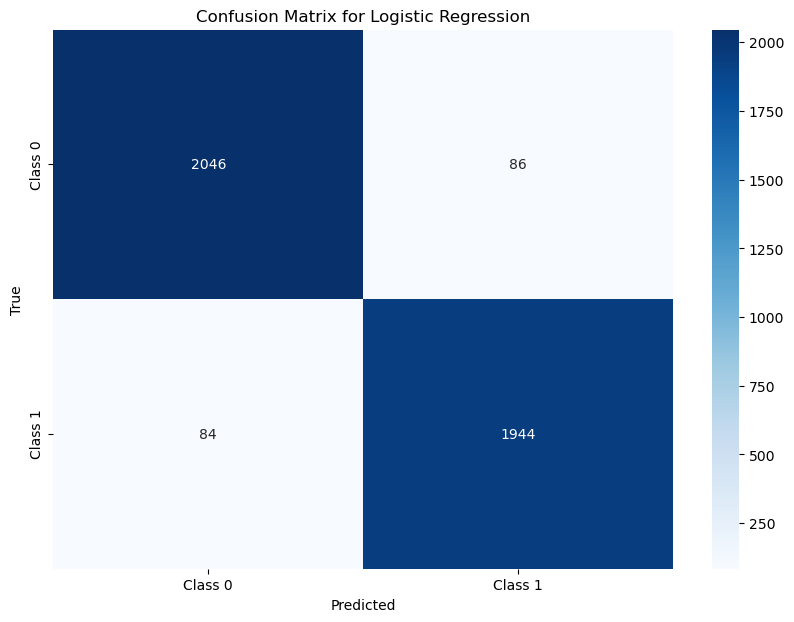

In [46]:
conf_matrix_lr = confusion_matrix(y_test, predict_lr)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

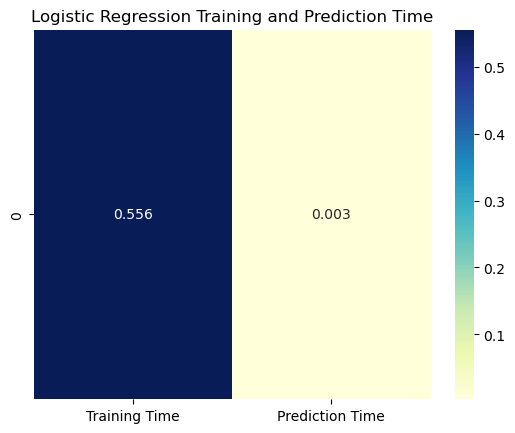

In [47]:
time_data_lr = pd.DataFrame({
    "Training Time": [time_train_lr],
    "Prediction Time": [time_predic_lr]
})

sns.heatmap(time_data_lr, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Logistic Regression Training and Prediction Time")
plt.show()

In [48]:
print("please input a text to label")
text_lr = input()
cleaned_lr = cleaning_text(text_lr)
vectorized_lr = vectorizer.transform([cleaned_lr])
predict_lr = lr.predict(vectorized_lr)
print(f"Predicted Label : {predict_lr}")

please input a text to label
Today President Biden said the N word
Predicted Label : [0]


#### Support Vector Machine

In [49]:
svm = SVC(kernel="linear")
t0_svm = time.time()
svm.fit(X_train_tfidf, y_train)
t1_svm = time.time()
predict_svm = svm.predict(X_test_tfidf)
t2_svm = time.time()

time_train_svm = t1_svm - t0_svm
time_predic_svm = t2_svm - t1_svm

In [50]:
print(f"Training Time : {time_train_svm:.4f}")
print(f"Prediction Time : {time_predic_svm:.4f}")
report_svm = classification_report(y_test, predict_svm, output_dict=True)
reliable_metrics_svm = report_svm["1"]
unreliable_metrics_svm = report_svm["0"]
print(f"Metrics for Class Reliable News: {reliable_metrics_svm}")
print(f"Metrics for Class Unreliable News: {unreliable_metrics_svm}")


accuracy_svm = accuracy_score(y_test, predict_svm)
f1_score_svm = classification_report(y_test, predict_svm, output_dict=True)["macro avg"]["f1-score"]
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_score_svm:.4f}")

Training Time : 218.5785
Prediction Time : 33.4376
Metrics for Class Reliable News: {'precision': 0.9674716609167078, 'recall': 0.967948717948718, 'f1-score': 0.9677101306384027, 'support': 2028.0}
Metrics for Class Unreliable News: {'precision': 0.9694978883153449, 'recall': 0.9690431519699813, 'f1-score': 0.9692704668074127, 'support': 2132.0}
Accuracy: 0.9685
F1 Score: 0.9685


In [51]:
print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2132
           1       0.97      0.97      0.97      2028

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [52]:
r2_svm = r2_score(y_test, predict_svm)
mse_svm = mean_squared_error(y_test, predict_svm)
mae_svm = mean_absolute_error(y_test, predict_svm)

print("SVM (Linear) Calssification Metrics")
print(f"R^2 Score: {r2_svm:.4f}")
print(f"MSE Score: {mse_svm:.4f}")
print(f"MAE Score: {mae_svm:.4f}")

SVM (Linear) Calssification Metrics
R^2 Score: 0.8740
MSE Score: 0.0315
MAE Score: 0.0315


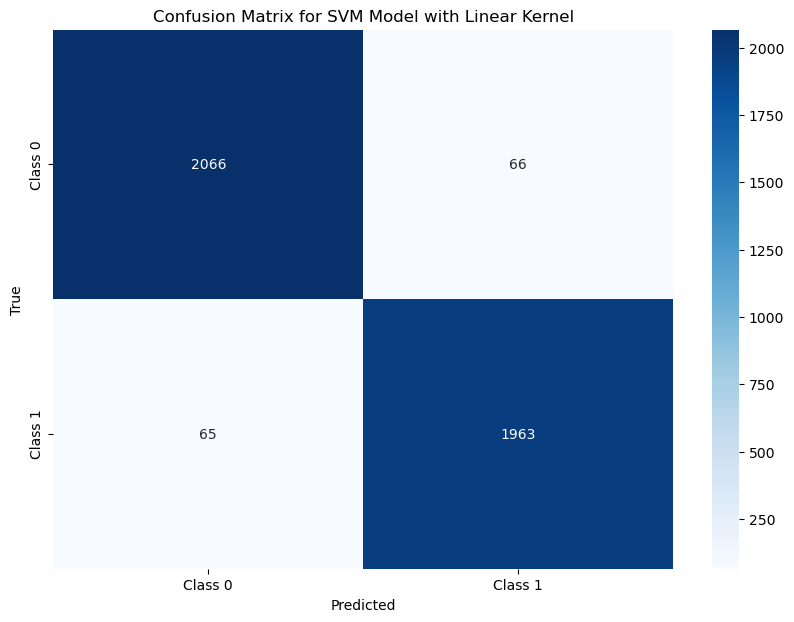

In [53]:
conf_matrix_svm = confusion_matrix(y_test, predict_svm)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM Model with Linear Kernel")
plt.show()

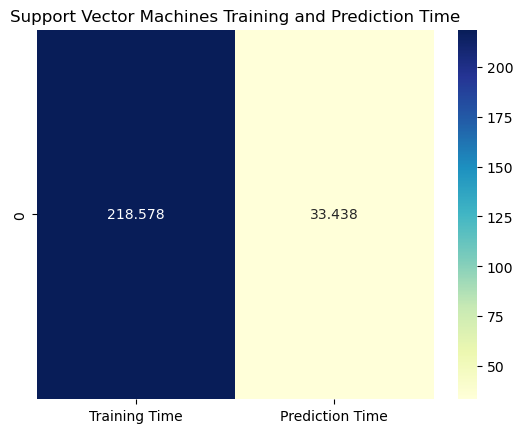

In [54]:
time_data_svm = pd.DataFrame({
    "Training Time": [time_train_svm],
    "Prediction Time": [time_predic_svm]
})

sns.heatmap(time_data_svm, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Support Vector Machines Training and Prediction Time")
plt.show()

In [55]:
print("please input a text to label")
text_svm = input()
cleaned_svm = cleaning_text(text_svm)
vectorized_svm = vectorizer.transform([cleaned_svm])
predict_svm = svm.predict(vectorized_svm)
print(f"Predicted Label : {predict_svm}")

please input a text to label
Today President Biden said the N word
Predicted Label : [0]


#### Random Forest

In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
t0_rf = time.time()
rf.fit(X_train_tfidf, y_train)
t1_rf = time.time()
predict_rf = rf.predict(X_test_tfidf)
t2_rf = time.time()

time_train_rf = t1_rf - t0_rf
time_predict_rf = t2_rf - t1_rf

In [57]:
print(f"Training Time : {time_train_rf:.4f}")
print(f"Prediction Time : {time_predict_rf:.4f}")
report_rf = classification_report(y_test, predict_rf, output_dict=True)
reliable_metrics_rf = report_rf["1"]
unreliable_metrics_rf = report_rf["0"]
print(f"Metrics for Class 1: {reliable_metrics_rf}")
print(f"Metrics for Class 0: {unreliable_metrics_rf}")

accuracy_rf = accuracy_score(y_test, predict_rf)
f1_score_rf = classification_report(y_test, predict_rf, output_dict=True)["macro avg"]["f1-score"]

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_score_rf:.4f}")

Training Time : 64.3569
Prediction Time : 0.4249
Metrics for Class 1: {'precision': 0.950591868244982, 'recall': 0.9107495069033531, 'f1-score': 0.9302442709644927, 'support': 2028.0}
Metrics for Class 0: {'precision': 0.9183581416328371, 'recall': 0.9549718574108818, 'f1-score': 0.9363071970567945, 'support': 2132.0}
Accuracy: 0.9334
F1 Score: 0.9333


In [58]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2132
           1       0.95      0.91      0.93      2028

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160



In [59]:
r2_rf = r2_score(y_test, predict_rf)
mse_rf = mean_squared_error(y_test, predict_rf)
mae_rf = mean_absolute_error(y_test, predict_rf)

print("Random Forest Calssification Metrics")
print(f"R^2 Score: {r2_rf:.4f}")
print(f"MSE Score: {mse_rf:.4f}")
print(f"MAE Score: {mae_rf:.4f}")

Random Forest Calssification Metrics
R^2 Score: 0.7335
MSE Score: 0.0666
MAE Score: 0.0666


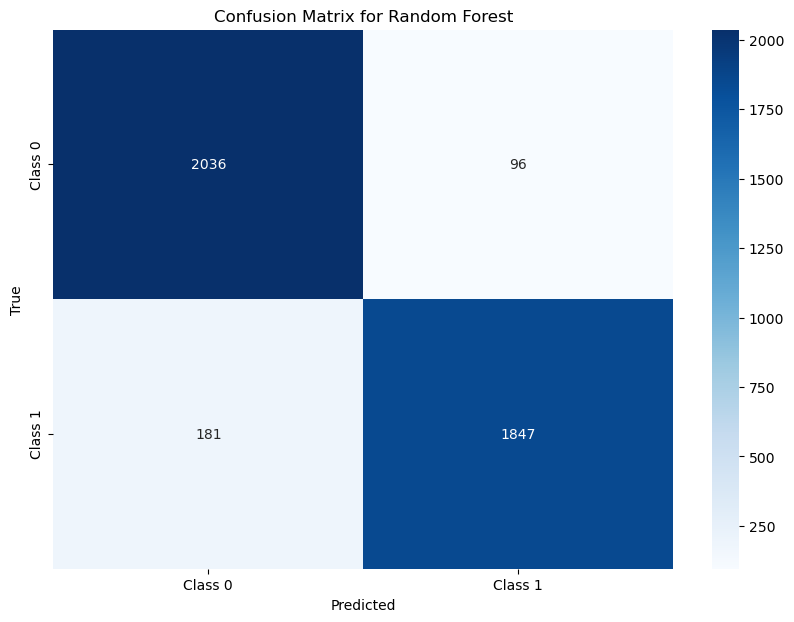

In [60]:
conf_matrix_rf = confusion_matrix(y_test, predict_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.show()

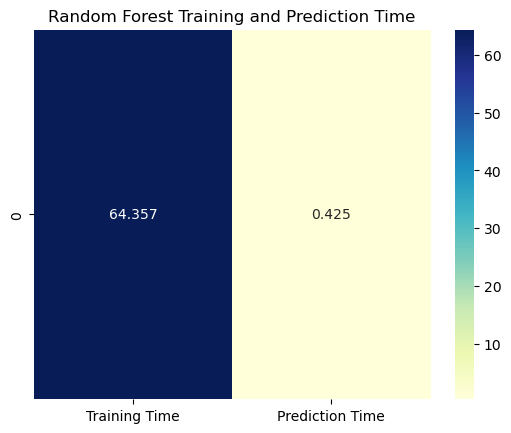

In [61]:
time_data_rf = pd.DataFrame({
    "Training Time": [time_train_rf],
    "Prediction Time": [time_predict_rf]
})

sns.heatmap(time_data_rf, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Random Forest Training and Prediction Time")
plt.show()

In [62]:
print("please input a text to label")
text_rf = input()
cleaned_rf = cleaning_text(text_rf)
vectorized_rf = vectorizer.transform([cleaned_rf])
predict_rf = rf.predict(vectorized_rf)
print(f"Predicted Label : {predict_rf}")

please input a text to label
Today President Biden said the N word
Predicted Label : [1]


#### Naive Bayes

In [63]:
nb = MultinomialNB()
t0_nb = time.time()
nb.fit(X_train_tfidf, y_train)
t1_nb = time.time()
predict_nb = nb.predict(X_test_tfidf)
t2_nb = time.time()

time_train_nb = t1_nb - t0_nb
time_predict_nb = t2_nb - t1_nb

In [64]:
print(f"Training Time : {time_train_nb:.4f}")
print(f"Prediction Time : {time_train_nb:.4f}")
report_nb = classification_report(y_test, predict_nb, output_dict=True)
class_1_metrics = report_nb["1"]
class_0_metrics = report_nb["0"]
print(f"Metrics for Class 1: {class_1_metrics}")
print(f"Metrics for Class 0: {class_0_metrics}")



accuracy_nb = accuracy_score(y_test, predict_nb)
f1_score_nb = classification_report(y_test, predict_nb, output_dict=True)["macro avg"]["f1-score"]

print(f"Accuracy: {accuracy_nb:.4f}")
print(f"F1 Score: {f1_score_nb:.4f}")

Training Time : 0.0279
Prediction Time : 0.0279
Metrics for Class 1: {'precision': 0.9662731871838112, 'recall': 0.8476331360946746, 'f1-score': 0.9030732860520094, 'support': 2028.0}
Metrics for Class 0: {'precision': 0.870222595548089, 'recall': 0.9718574108818011, 'f1-score': 0.9182362065145137, 'support': 2132.0}
Accuracy: 0.9113
F1 Score: 0.9107


In [65]:
print(classification_report(y_test,predict_nb))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2132
           1       0.97      0.85      0.90      2028

    accuracy                           0.91      4160
   macro avg       0.92      0.91      0.91      4160
weighted avg       0.92      0.91      0.91      4160



In [66]:
r2_nb = r2_score(y_test, predict_nb)
mse_nb = mean_squared_error(y_test, predict_nb)
mae_nb = mean_absolute_error(y_test, predict_nb)

print("Naive Bayes Calssification Metrics")
print(f"R^2 Score: {r2_nb:.4f}")
print(f"MSE Score: {mse_nb:.4f}")
print(f"MAE Score: {mae_nb:.4f}")

Naive Bayes Calssification Metrics
R^2 Score: 0.6450
MSE Score: 0.0887
MAE Score: 0.0887


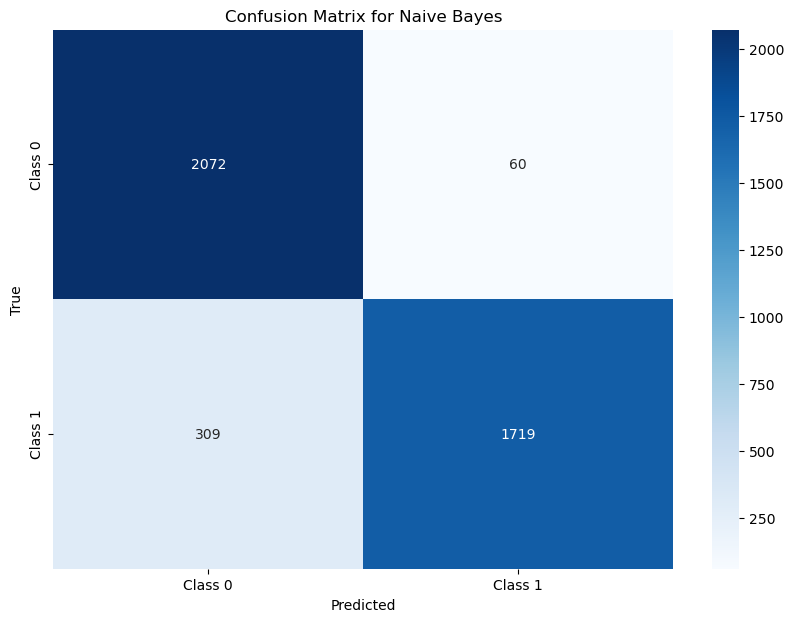

In [67]:
conf_matrix_nb = confusion_matrix(y_test, predict_nb)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

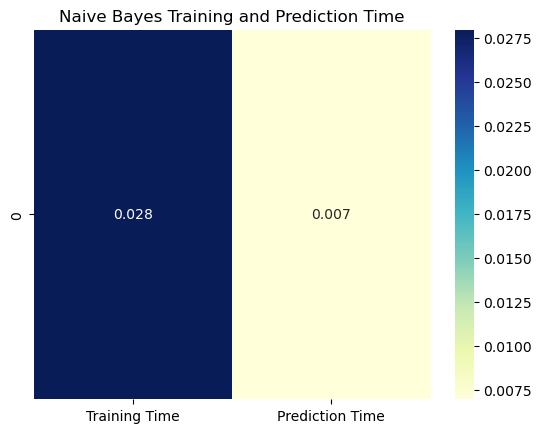

In [68]:
time_data_nb = pd.DataFrame({
    "Training Time": [time_train_nb],
    "Prediction Time": [time_predict_nb]
})

sns.heatmap(time_data_nb, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Naive Bayes Training and Prediction Time")
plt.show()

In [69]:
print("please input a text to label")
text_nb = input()
cleaned_nb = cleaning_text(text_nb)
vectorized_nb = vectorizer.transform([cleaned_nb])
predict_nb = nb.predict(vectorized_nb)
print(f"Predicted Label : {predict_nb}")

please input a text to label
Today President Biden said the N word
Predicted Label : [1]


#### Convulutional Neural Networks

In [70]:
tokenizer = Tokenizer(num_words=5000)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_enc))
y_train_onehot = to_categorical(y_train_enc, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_enc, num_classes=num_classes)

In [71]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          500000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 48, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 44, 128)           82048     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               1

In [72]:
t0_cnn = time.time()
history = model.fit(X_train_pad, y_train_onehot, epochs = 10, verbose = 2, validation_split = 0.2, batch_size = 32)
t1_cnn = time.time()
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
t2_cnn = time.time()

time_train_cnn = t1_cnn - t0_cnn
time_predict_cnn = t2_cnn - t1_cnn

Epoch 1/10
416/416 - 8s - loss: 0.6935 - accuracy: 0.4965 - val_loss: 0.6941 - val_accuracy: 0.4907 - 8s/epoch - 20ms/step
Epoch 2/10
416/416 - 6s - loss: 0.6932 - accuracy: 0.5075 - val_loss: 0.6939 - val_accuracy: 0.4907 - 6s/epoch - 16ms/step
Epoch 3/10
416/416 - 6s - loss: 0.6931 - accuracy: 0.5073 - val_loss: 0.6936 - val_accuracy: 0.4907 - 6s/epoch - 16ms/step
Epoch 4/10
416/416 - 6s - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6935 - val_accuracy: 0.4907 - 6s/epoch - 15ms/step
Epoch 5/10
416/416 - 6s - loss: 0.6931 - accuracy: 0.5068 - val_loss: 0.6934 - val_accuracy: 0.4907 - 6s/epoch - 15ms/step
Epoch 6/10
416/416 - 6s - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6934 - val_accuracy: 0.4907 - 6s/epoch - 16ms/step
Epoch 7/10
416/416 - 6s - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6936 - val_accuracy: 0.4907 - 6s/epoch - 16ms/step
Epoch 8/10
416/416 - 7s - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6933 - val_accuracy: 0.4907 - 7s/epoch - 16ms/step
Epoch 9/10
416/4

In [73]:
print(f"Training Time : {time_train_cnn:.4f}")
print(f"Prediction Time : {time_predict_cnn:.4f}")

loss, accuracy = model.evaluate(X_test_pad, y_test_onehot, verbose = 0)
print(f'Accuracy: {accuracy:.4f}')


y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)


y_test_labels = label_encoder.inverse_transform(y_test_enc)
y_pred_labels = label_encoder.inverse_transform(y_pred)


print(classification_report(y_test_labels, y_pred_labels))

Training Time : 66.6907
Prediction Time : 0.8147
Accuracy: 0.4875
130/130 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2132
           1       0.49      1.00      0.66      2028

    accuracy                           0.49      4160
   macro avg       0.24      0.50      0.33      4160
weighted avg       0.24      0.49      0.32      4160



C:\Users\Mustafa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mustafa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mustafa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


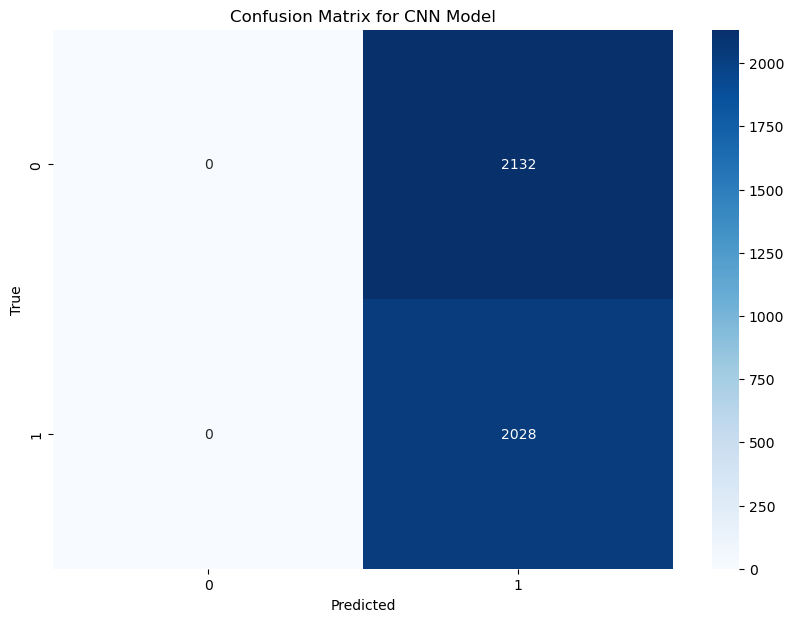

In [74]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for CNN Model")
plt.show()

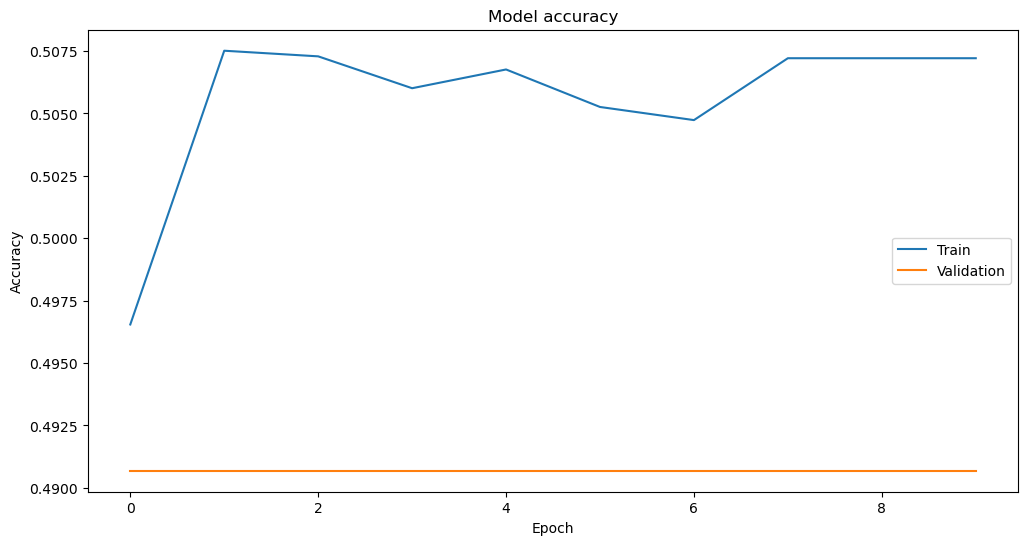

In [75]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

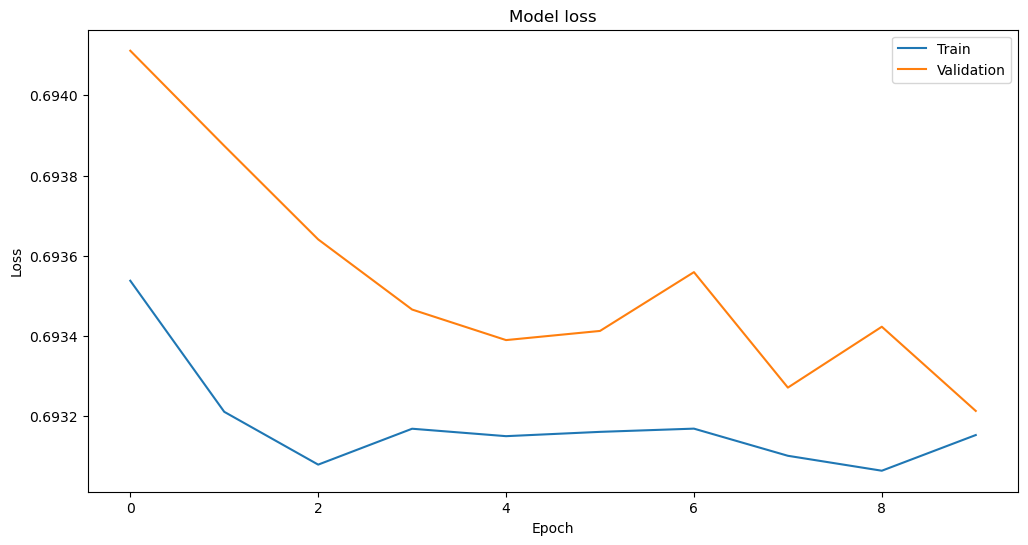

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()